PROGNOSAI ASSIGNMENT-1

1. Load and Inspect the CMAPSS Dataset
Task:

Write Python code to load the raw train_FD001.txt dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
Expected Output: DataFrame shape, info, and sample rows.
Use the link to download the dataset: https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Define column names
column_names = [
    "engine_id", "cycle",
    "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]

# Load dataset with correct separator
df = pd.read_csv(
    'C:/Users/Admin/Downloads/train_FD001.txt',
    sep=r'\s+',   
    header=None,
    names=column_names,
    engine='python'  # optional, to silence warning
)

# Display DataFrame details
print("Shape of the DataFrame:", df.shape)

print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())


Shape of the DataFrame: (20631, 26)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-nu

2. Visualize Sensor Distributions and Identify Missing Values
   :

Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
Expected Output: Three histogram plots and a summary/report on missing values per column.

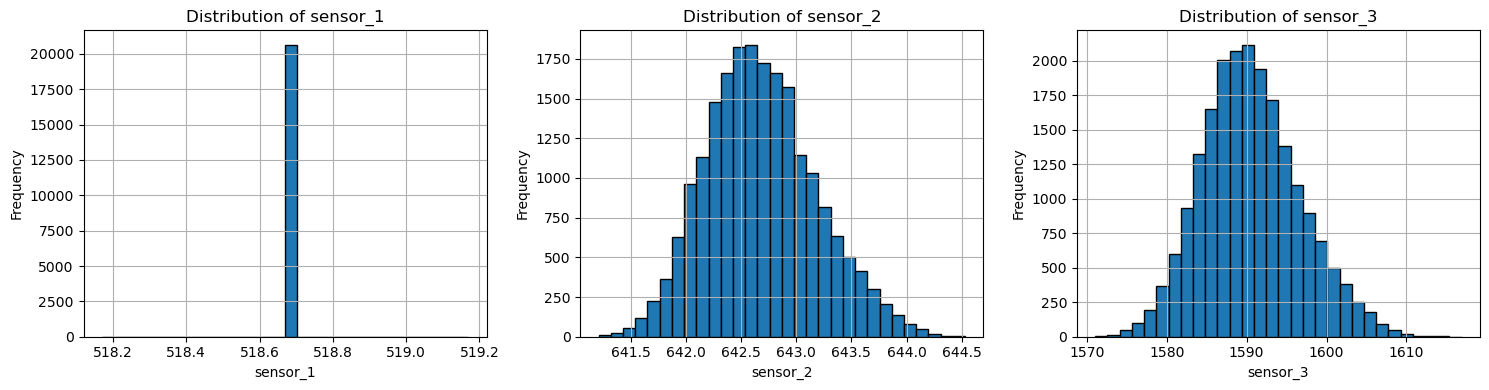

Missing Values Info:

No missing values found.


In [3]:
import matplotlib.pyplot as plt
# 1. Choose three sensors to visualize
sensors_to_plot = ["sensor_1", "sensor_2", "sensor_3"]

# Plot histograms
plt.figure(figsize=(15, 4))
for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(1, 3, i)
    df[sensor].hist(bins=30, edgecolor='black')
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Check for missing values
missing_summary = df.isnull().sum()

print("Missing Values Info:\n")
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 
      else "No missing values found.")


3. Feature Engineering – Aggregation and Rolling Statistics:

For a selected sensor (e.g., sensor_2), compute and append to the DataFrame:
The mean and standard deviation of sensor_2 by each engine_id

The rolling mean (window size=5) for each engine’s sensor_2 readings

Expected Output: Show a few sample rows with these new features.

In [4]:
# 1. Mean of sensor_2 per engine
df['sensor_2_mean'] = df.groupby('engine_id')['sensor_2'].transform('mean')

# 2. Std Dev of sensor_2 per engine
df['sensor_2_std'] = df.groupby('engine_id')['sensor_2'].transform('std')

# 3. Rolling mean (window=5) of sensor_2 per engine
df['sensor_2_roll_mean_5'] = (
    df.groupby('engine_id')['sensor_2']
      .transform(lambda x: x.rolling(window=5, min_periods=1).mean())
)

# Display sample rows
print(df[['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean', 'sensor_2_std', 'sensor_2_roll_mean_5']].head(15))


    engine_id  cycle  sensor_2  sensor_2_mean  sensor_2_std  \
0           1      1    641.82     642.621042      0.486795   
1           1      2    642.15     642.621042      0.486795   
2           1      3    642.35     642.621042      0.486795   
3           1      4    642.35     642.621042      0.486795   
4           1      5    642.37     642.621042      0.486795   
5           1      6    642.10     642.621042      0.486795   
6           1      7    642.48     642.621042      0.486795   
7           1      8    642.56     642.621042      0.486795   
8           1      9    642.12     642.621042      0.486795   
9           1     10    641.71     642.621042      0.486795   
10          1     11    642.28     642.621042      0.486795   
11          1     12    642.06     642.621042      0.486795   
12          1     13    643.07     642.621042      0.486795   
13          1     14    642.35     642.621042      0.486795   
14          1     15    642.43     642.621042      0.48

4. Data Normalization:

Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, maintaining the original engine_id and cycle columns.
Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Select sensor columns
sensor_cols = [col for col in df.columns if 'sensor_' in col]

# 2. Initialize scaler
scaler = StandardScaler()

# 3. Fit and transform sensor columns
scaled_values = scaler.fit_transform(df[sensor_cols])

# 4. Create normalized DataFrame
df_normalized = pd.DataFrame(scaled_values, columns=sensor_cols)

# 5. Preserve engine_id and cycle
df_normalized.insert(0, 'cycle', df['cycle'])
df_normalized.insert(0, 'engine_id', df['engine_id'])

# 6. Display results
print("Head of normalized DataFrame:\n")
print(df_normalized.head())

print("\nMeans after normalization:")
print(df_normalized[sensor_cols].mean().round(4))

print("\nStds after normalization:")
print(df_normalized[sensor_cols].std().round(4))






Head of normalized DataFrame:

   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_15     sensor_16  sensor_17  \
0  0.141683  1.121141 -0.516338  ...  -0.603816 -1.387779e-17  -0.781710   
1  0.141683  0.431930 -0.798093  ...  -0.275852 -1.387779e-17  -0.781710   
2  0.141683  1.008155 -0.234584  ...  -0.649144 -1.387779e-17  -2.073094   
3  0.141683  1.222827  0.188048  ...  -1.971665 -1.387779e-17  -0.781710   
4  0.141683  0.714393 -0.516338  ...  -0.339845 -1.387779e-17  -0.136018   

   sensor_18  sensor_19  sensor_20  sensor_21  se

5. Rolling Window Sequence Generation:

Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
Expected Output: Array shape, example content, and confirmation of successful file saves.

In [4]:
import numpy as np
import pandas as pd

def generate_sequences(df, window_size=30, sensor_cols=None):
    sequences = []
    engine_ids = []
    cycles = []

    #all sensor columns
    if sensor_cols is None:
        sensor_cols = [col for col in df.columns if "sensor_" in col]

    # Generate sequences per engine
    for eng_id, eng_df in df.groupby("engine_id"):
        eng_df = eng_df.sort_values("cycle")
        data = eng_df[sensor_cols].values

        for i in range(len(data) - window_size + 1):
            seq = data[i:i+window_size]  # extract sequence
            sequences.append(seq)
            engine_ids.append(eng_id)
            cycles.append(eng_df.iloc[i+window_size-1]["cycle"])
    
    sequences = np.array(sequences)
    return sequences, engine_ids, cycles 

# Load dataset
column_names = ["engine_id", "cycle"] + [f"operational_setting_{i}" for i in range(1,4)] + [f"sensor_{i}" for i in range(1,22)]
df = pd.read_csv(r"C:\Users\Admin\Downloads\train_FD001.txt", sep=r"\s+", header=None, names=column_names)

# Select only sensor columns
sensor_cols = [col for col in df.columns if "sensor_" in col]

# Generate rolling sequences
sequences, engine_ids, cycles = generate_sequences(df, window_size=30, sensor_cols=sensor_cols)

# Save outputs
np.save("sequences.npy", sequences)
pd.DataFrame({"engine_id": engine_ids, "cycle": cycles}).to_csv("sequence_metadata.csv", index=False)

# Print confirmation
print("Shape of sequence array:", sequences.shape)  # (num_sequences, 30, num_features)
print("\nFirst sequence (example):")
print(sequences[0])
print('\nMeta info saved: sequence_metadata.csv and sequences.npy')


Shape of sequence array: (17731, 30, 21)

First sequence (example):
[[5.18670e+02 6.41820e+02 1.58970e+03 1.40060e+03 1.46200e+01 2.16100e+01
  5.54360e+02 2.38806e+03 9.04619e+03 1.30000e+00 4.74700e+01 5.21660e+02
  2.38802e+03 8.13862e+03 8.41950e+00 3.00000e-02 3.92000e+02 2.38800e+03
  1.00000e+02 3.90600e+01 2.34190e+01]
 [5.18670e+02 6.42150e+02 1.59182e+03 1.40314e+03 1.46200e+01 2.16100e+01
  5.53750e+02 2.38804e+03 9.04407e+03 1.30000e+00 4.74900e+01 5.22280e+02
  2.38807e+03 8.13149e+03 8.43180e+00 3.00000e-02 3.92000e+02 2.38800e+03
  1.00000e+02 3.90000e+01 2.34236e+01]
 [5.18670e+02 6.42350e+02 1.58799e+03 1.40420e+03 1.46200e+01 2.16100e+01
  5.54260e+02 2.38808e+03 9.05294e+03 1.30000e+00 4.72700e+01 5.22420e+02
  2.38803e+03 8.13323e+03 8.41780e+00 3.00000e-02 3.90000e+02 2.38800e+03
  1.00000e+02 3.89500e+01 2.33442e+01]
 [5.18670e+02 6.42350e+02 1.58279e+03 1.40187e+03 1.46200e+01 2.16100e+01
  5.54450e+02 2.38811e+03 9.04948e+03 1.30000e+00 4.71300e+01 5.22860e+02
 